# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
#pip install citipy 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [3]:
#print(weather_api_key)

### Generate the Cities List by Using the `citipy` Library

In [4]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 619


In [5]:
cities

['bluff',
 'rikitea',
 'buchanan',
 'bara',
 'hilo',
 'kavieng',
 'port alfred',
 'saskylakh',
 'sitka',
 'ushuaia',
 'taolanaro',
 'tsihombe',
 'kirn',
 'vaini',
 'mataura',
 'amderma',
 'selma',
 'elizabeth city',
 'chabahar',
 'alofi',
 'tirukkoyilur',
 'bethel',
 'kaitangata',
 'samarai',
 'codrington',
 'ovsyanka',
 'hobart',
 'san quintin',
 'burns lake',
 'hasaki',
 'guerrero negro',
 'krasnyy chikoy',
 'kholodnyy',
 'atar',
 'hermanus',
 'pousat',
 'yellowknife',
 'novyy urengoy',
 'albany',
 'craig',
 'diu',
 'xalpatlahuac',
 'souillac',
 'flin flon',
 'kruisfontein',
 'otavi',
 'punta arenas',
 'karatau',
 'luwuk',
 'ahipara',
 'khatanga',
 'yar-sale',
 'illoqqortoormiut',
 'luanda',
 'tenango',
 'alghero',
 'shenjiamen',
 'burica',
 'fuyang',
 'amazar',
 'grand gaube',
 'cape town',
 'hun',
 'haines junction',
 'atuona',
 'san juan',
 'kayes',
 'morant bay',
 'hualmay',
 'whitehorse',
 'basco',
 'zhezkazgan',
 'guane',
 'provideniya',
 'caravelas',
 'puerto ayora',
 'bredasd

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "&q=" + city 

    
    # # Log the url, record, and set numbers
    import json
    import os
    
    response = requests.get(city_url).json()
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))
    # print(json.dumps(response, indent=4, sort_keys=True))
    # # Add 1 to the record count
    record_count += 1

    # # Run an API request for each of the cities
    
    
    #     # Parse the JSON and retrieve data


# filepath = os.path.join("..", "python-api-challenge-main", "")

    city_weather = response 
    # print(city_weather)
    

    #     # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
    try:
        city_lat = city_weather["coord"]["lat"] 
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    #     # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | bluff
Processing Record 2 of Set 1 | rikitea
Processing Record 3 of Set 1 | buchanan
Processing Record 4 of Set 1 | bara
Processing Record 5 of Set 1 | hilo
Processing Record 6 of Set 1 | kavieng
Processing Record 7 of Set 1 | port alfred
Processing Record 8 of Set 1 | saskylakh
Processing Record 9 of Set 1 | sitka
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 12 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 13 of Set 1 | kirn
Processing Record 14 of Set 1 | vaini
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | amderma
City not found. Skipping...
Processing Record 17 of Set 1 | selma
Processing Record 18 of Set 1 | elizabeth city
Processing Record 19 of Set 1 | chabahar
Processing Record 20 of Set 1 | alofi
Processing Record 21 of Set 1 | tirukkoyilur
Processing Record 22 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
# city_data_df = pd.DataFrame({"City": cities, 
#                           "Lat": city_lat, 
#                           "Lng": city_lng, 
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,bluff,-46.6000,168.3333,61.92,97,100,9.08,NZ,1675351146
1,rikitea,-23.1203,-134.9692,78.75,73,10,17.13,PF,1675351146
2,buchanan,5.8808,-10.0467,84.99,67,53,10.78,LR,1675351147
3,bara,10.3744,10.7288,97.05,11,35,13.09,NG,1675351147
4,hilo,19.7297,-155.0900,77.29,82,0,8.05,US,1675351147


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,61.92,97,100,9.08,NZ,1675351146
1,rikitea,-23.1203,-134.9692,78.75,73,10,17.13,PF,1675351146
2,buchanan,5.8808,-10.0467,84.99,67,53,10.78,LR,1675351147
3,bara,10.3744,10.7288,97.05,11,35,13.09,NG,1675351147
4,hilo,19.7297,-155.0900,77.29,82,0,8.05,US,1675351147


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

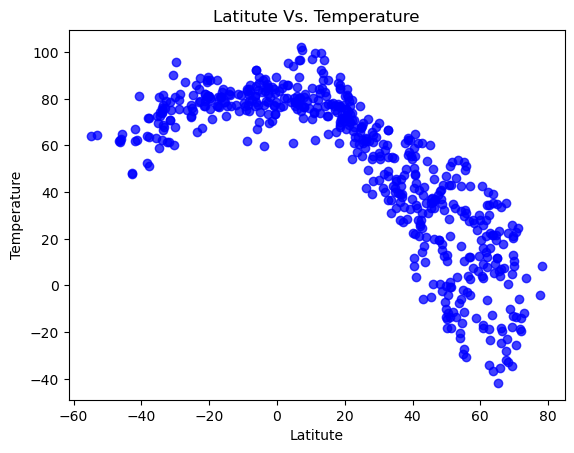

In [11]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker='o', facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitute Vs. Temperature")
plt.xlabel("Latitute")
plt.ylabel("Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

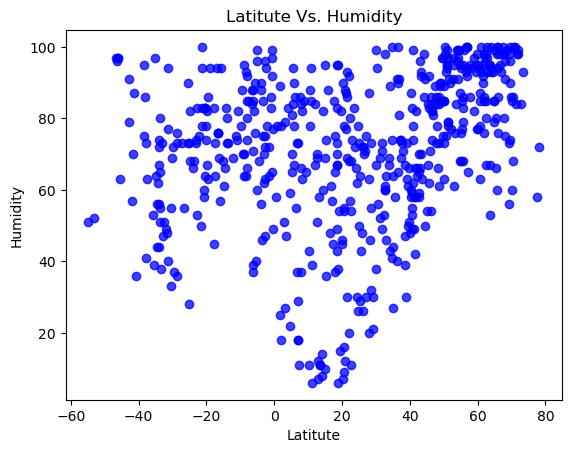

In [12]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker='o', facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitute Vs. Humidity")
plt.xlabel("Latitute")
plt.ylabel("Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

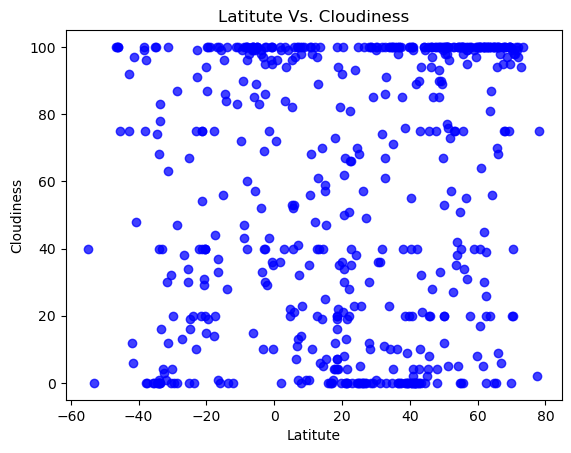

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker='o', facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitute Vs. Cloudiness")
plt.xlabel("Latitute")
plt.ylabel("Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

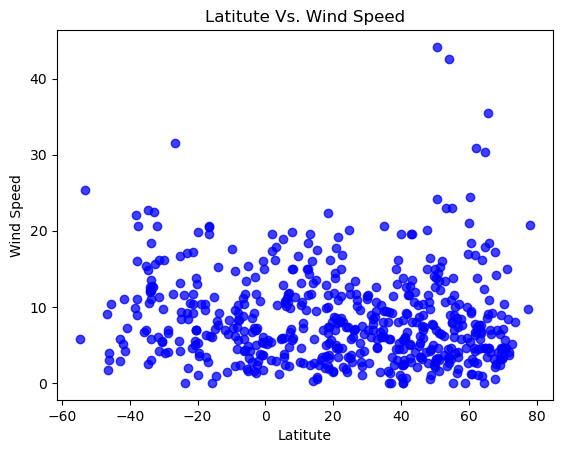

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker='o', facecolors="blue", alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitute Vs. Wind Speed")
plt.xlabel("Latitute")
plt.ylabel("Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [15]:
# Define a function to create Linear Regression plots
corr = round(city_data_df['Lat'].corr(city_data_df['Humidity']), 2)
print(f"The correlation between Latitude and the Humidity is {corr}")
# Convert to floats and store Latitude and Humidityl as x and y values
x_values = city_data_df["Lat"].astype("float")
y_values = city_data_df["Humidity"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(line_eq)

The correlation between Latitude and the Humidity is 0.27
y = 0.18x + 67.26


In [16]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,buchanan,5.8808,-10.0467,84.99,67,53,10.78,LR,1675351147
3,bara,10.3744,10.7288,97.05,11,35,13.09,NG,1675351147
4,hilo,19.7297,-155.0900,77.29,82,0,8.05,US,1675351147
7,saskylakh,71.9167,114.0833,-13.79,98,100,4.09,RU,1675351101
8,sitka,57.0531,-135.3300,42.69,65,100,10.36,US,1675351148


In [17]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,bluff,-46.6000,168.3333,61.92,97,100,9.08,NZ,1675351146
1,rikitea,-23.1203,-134.9692,78.75,73,10,17.13,PF,1675351146
5,kavieng,-2.5744,150.7967,82.20,75,95,7.25,PG,1675351148
6,port alfred,-33.5906,26.8910,77.18,80,78,3.00,ZA,1675351050
9,ushuaia,-54.8000,-68.3000,64.02,51,40,5.75,AR,1675351098


###  Temperature vs. Latitude Linear Regression Plot

R squared: 0.7410078504728342


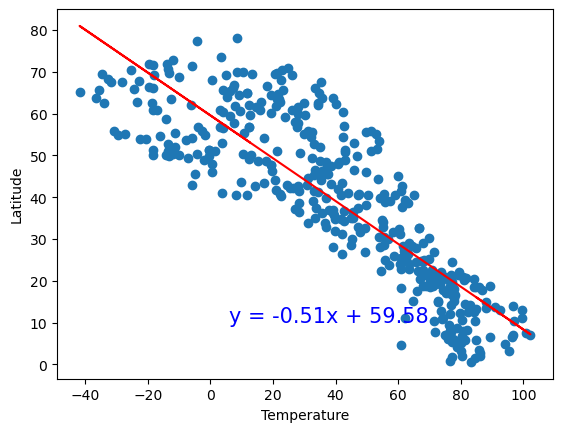

In [18]:
# Linear regression on Northern Hemisphere
# Convert to floats and store Latitude and Humidityl as x and y values
x_values = northern_hemi_df["Max Temp"].astype("float")
y_values = northern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.3067540489228595


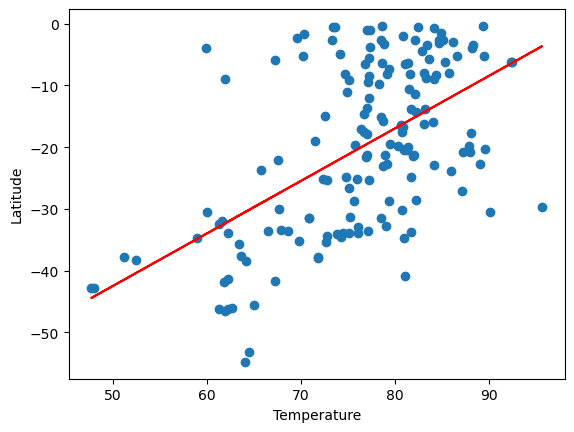

In [19]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Max Temp"].astype("float")
y_values = southern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Temperature')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

R squared: 0.27772884825922767


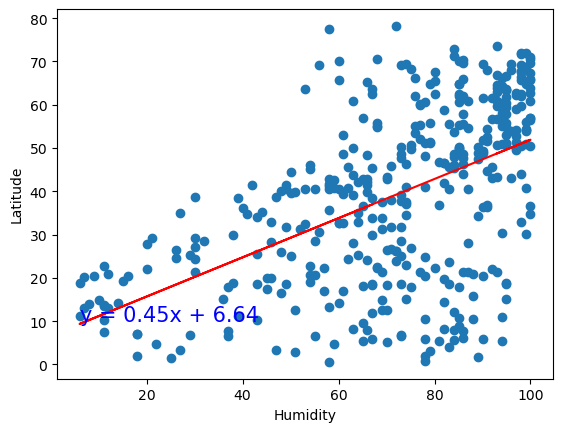

In [20]:
# Northern Hemisphere
# Convert to floats and store Latitude and Humidityl as x and y values
x_values = northern_hemi_df["Humidity"].astype("float")
y_values = northern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.046268013898430056


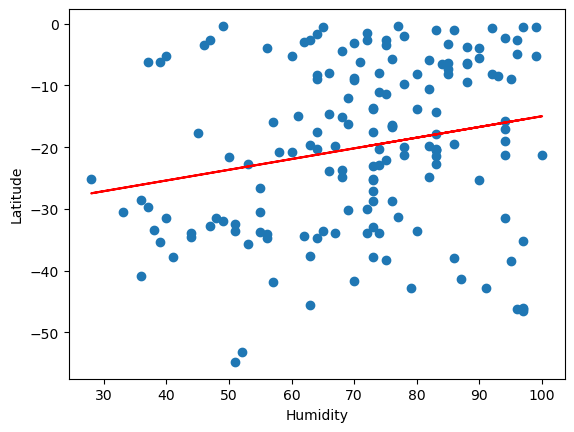

In [21]:
# Southern Hemisphere
x_values = southern_hemi_df["Humidity"].astype("float")
y_values = southern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Humidity')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

R squared: 0.08049431981608954


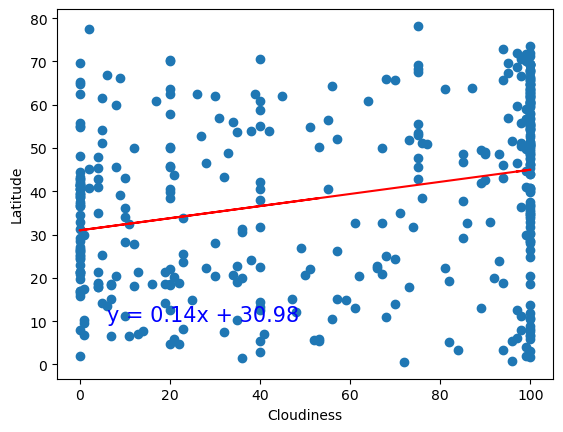

In [22]:
# Northern Hemisphere
# Convert to floats and store Latitude and Humidityl as x and y values
x_values = northern_hemi_df["Cloudiness"].astype("float")
y_values = northern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.09267455165320722


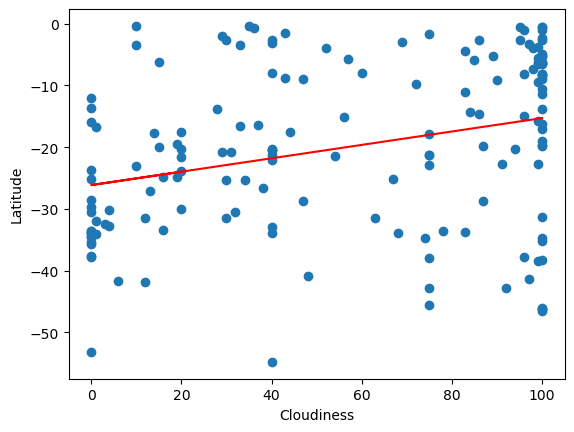

In [23]:
# Southern Hemisphere
x_values = southern_hemi_df["Cloudiness"].astype("float")
y_values = southern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Cloudiness')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

R squared: 0.0006448511156336354


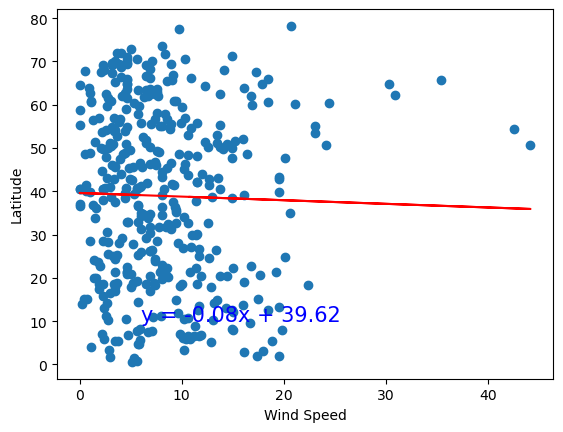

In [24]:
# Northern Hemisphere
# Convert to floats and store Latitude and Humidityl as x and y values
x_values = northern_hemi_df["Wind Speed"].astype("float")
y_values = northern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

R squared: 0.05961292193944399


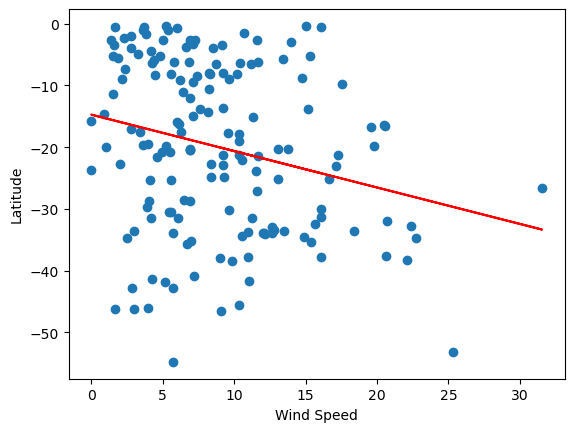

In [25]:
# Southern Hemisphere
x_values = southern_hemi_df["Wind Speed"].astype("float")
y_values = southern_hemi_df["Lat"].astype("float")

# # Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
# Plot scatter plot
plt.scatter(x_values,y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="blue")

# Label plot
plt.xlabel('Wind Speed')
plt.ylabel('Latitude')

# Print r square value
print(f"R squared: {rvalue**2}")

# Show plot
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE